<a href="https://colab.research.google.com/github/al-alamin/ENSF619.2_ImageAnalysis/blob/main/Assignment_1/619_assignment_01_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #01

- More details coming soon...



## Setup

In [1]:
! git clone https://github.com/rmsouza01/ENSF619.2.git
! git clone https://github.com/rmsouza01/siamxt.git; cd siamxt; python setup.py install

Cloning into 'ENSF619.2'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 91 (delta 28), reused 74 (delta 15), pack-reused 0
Unpacking objects: 100% (91/91), done.
Cloning into 'siamxt'...
remote: Enumerating objects: 218, done.
remote: Total 218 (delta 0), reused 0 (delta 0), pack-reused 218
Receiving objects: 100% (218/218), 3.92 MiB | 10.68 MiB/s, done.
Resolving deltas: 100% (119/119), done.
running install
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/siamxt
copying siamxt/_aux.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/morph_tree_alpha.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/max_tree_alpha.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/build_max_tree.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/morph_tree_alpha_methods.py -> build/lib.linux-x86_64-3.7/siamxt
copyin

Importing necessary libaries

In [ ]:
import numpy as np # numpy is the major library in which siamxt was built upon
                   # we like the array programming style =)

# We are using PIL to read images     
from PIL import Image

# and matplotlib to display images
import matplotlib.pyplot as plt

import siamxt  

### Some Helper methods

In [ ]:
def get_negative_img(img):
  # Negating the image
  img_max = img.max()
  img_neg = img_max-img
  return img_neg


def apply_area_open_filter(img, Bc, area):
  #Building the max-tree of the negated image, i.e. min-tree
  mxt = siamxt.MaxTreeAlpha(img,Bc)
  #Applying an area-open filter
  mxt.areaOpen(area)
  #Recovering the image 
  img_filtered =  mxt.getImage()

  return img_filtered

# Input is an image and returns an image after applying filter
def apply_extinction_filter(img, Bc, n):   
    #Building the max-tree of the negated image, i.e. min-tree
    mxt = siamxt.MaxTreeAlpha(img, Bc)
    # Select the area attribute of the max-tree nodes from NA
    area = mxt.node_array[3,:]
    # Computes the area extinction values
    area_ext = mxt.computeExtinctionValues(area, "area")
    
    # Applies the  area extinction filter
    mxt.extinctionFilter(area_ext, n)
    #Recovering the image 
    img_filtered =  mxt.getImage()
    return img_filtered

def show_image(img, title):
    fig = plt.figure()
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

## Assignment taks

### Part 1 (Monalisa)

**Part 1)** Using the max tree area signature analysis, determined CCs in the max tree
that separate Mona Lisa’s face from the background

(317, 213)


Text(0.5, 1.0, 'Reconstruction at h = 85')

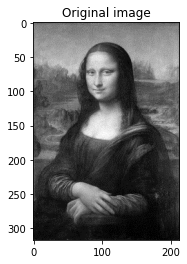

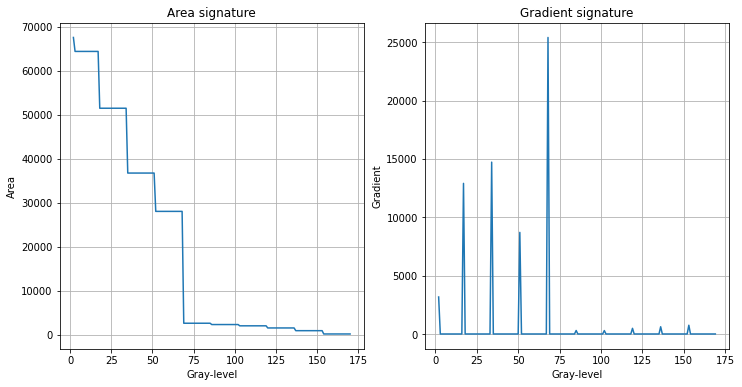

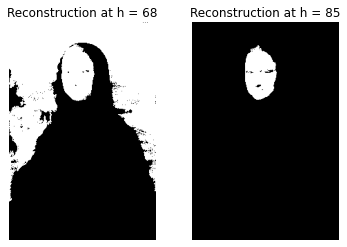

In [ ]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/monalisa.png").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')

plt.title("Original image")



#Structuring element with connectivity-4 
Bc = np.zeros((3,3), dtype = bool)
Bc[1,:] = True
Bc[:,1] = True



# Building the max-tree
mxt = siamxt.MaxTreeAlpha(img,Bc)

#Hand-picked regional maxima
x,y = 83,90

# Node corresponding to a regional maximum
node = mxt.node_index[x,y]

# Extracting area attribute from NA
area = mxt.node_array[3,:]

# Area signature computation
levels,signature =  mxt.getSignature(area, node)

#Gradient of the area signature
gradient = signature[0:-1] - signature[1:]

# Display area signature
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.plot(levels,signature)
plt.grid()
plt.xlabel("Gray-level")
plt.ylabel("Area")
plt.title("Area signature")


# Display gradient of the area signature
plt.subplot(122)
plt.grid()
plt.plot(levels[0:-1],gradient)
plt.xlabel("Gray-level")
plt.ylabel("Gradient")
plt.title("Gradient signature")


# Selecting the peak of the gradient
index = np.argsort(gradient)[::-1][0]

#reconstructing the node corresponding to the peak (largest area)
area1 = signature[index]
node1 = np.where(mxt.node_array[3,:] == area1)[0][0]
cc1 = mxt.recConnectedComponent(node1)

#reconstructing the node corresponding to the peak (smaller area)
area2 = signature[index + 1]
node2 = np.where(mxt.node_array[3,:] == area2)[0][0]
cc2 = mxt.recConnectedComponent(node2)


#Displaying the nodes reconstructed    
fig = plt.figure()
plt.subplot(121)
plt.imshow(cc1, cmap='Greys_r')
plt.axis('off')
plt.title("Reconstruction at h = %d" %mxt.node_array[2,node1])
plt.subplot(122)
plt.imshow(cc2, cmap='Greys_r')
plt.axis('off')
plt.title("Reconstruction at h = %d" %mxt.node_array[2,node2])

### Part 2 artery

**Part 2)** Apply a series of filters to this image to segment the carotid arteries wall

(322, 322)


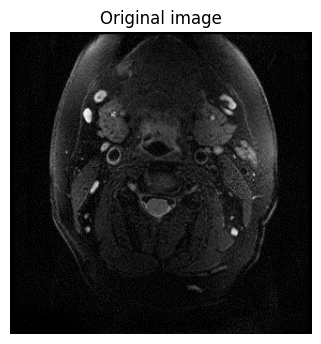

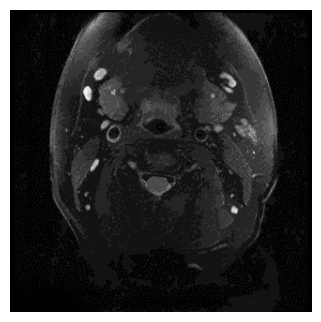

In [ ]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/carotid.png").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure(dpi=100)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...

#Structuring element with connectivity-4 
Bc = np.zeros((3,3), dtype = bool)
Bc[1,:] = True
Bc[:,1] = True


# Recovering the filtered the image
img = get_negative_img(img)
img_filtered = apply_extinction_filter(img,Bc,11)
img_filtered=get_negative_img(img_filtered)

fig = plt.figure(dpi=100)
plt.imshow(img_filtered, cmap='gray')
plt.axis('off')
#plt.title("Bounding-box and rectangularity filter")
plt.show()

### Part 3 (filter white spots)

**Parte 3)** Apply a series of filters to remove the white artifacts in the image

(320, 213)


Text(0.5, 1.0, 'area-open, area = 45 ')

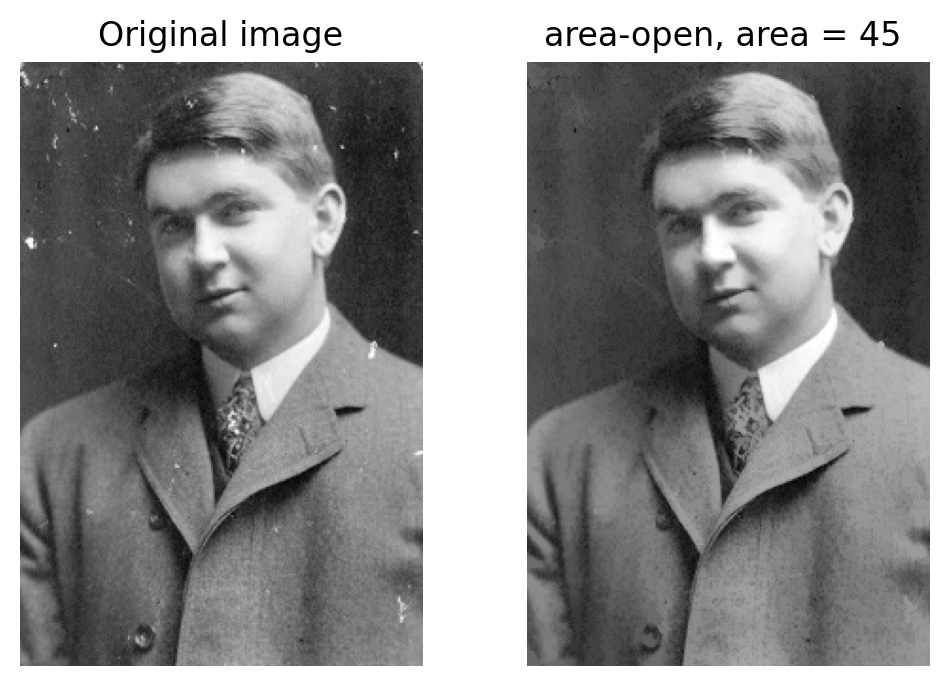

In [ ]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/filtering-image.jpg").convert("L"))
print(img.shape)


#Structuring element with connectivity-8
Bc = np.ones((3,3),dtype = bool)
#Bc[1,:] = True
#Bc[:,1] = True

# Area threshold
area = 45

#applying area filter
img_filtered = apply_area_open_filter(img, Bc, area)

# Negating the image back
#img_filtered = img_max -img_filtered

#Displaying the filtered image
fig = plt.figure(dpi=200)

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(img_filtered, cmap='gray')
plt.axis('off')
plt.title("area-open, area = %d " %area)

### Part 4 (Remove Objects)

**Part 4)** Apply a series of filters that will remove all objects in the image except for the
two pens

In [ ]:
#Structuring element with connectivity-4 
Bc = np.zeros((3,3), dtype = bool)
Bc[1,:] = True
Bc[:,1] = True

# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/objects.png").convert("L"))
print(img.shape)


(381, 384)


#### Experiment with extinction filter

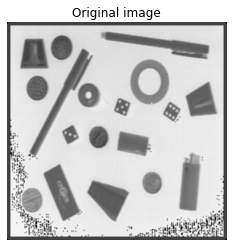

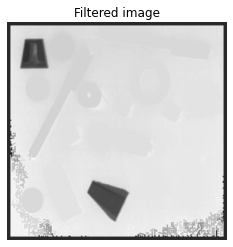

In [ ]:

show_image(img, "Original image")

# Recovering the filtered the image
neg_img = get_negative_img(img)
img_filtered = apply_extinction_filter(neg_img, Bc, 3)
img_filtered = get_negative_img(img_filtered)


show_image(img_filtered, "Filtered image")

#### Experiment with Area open filter

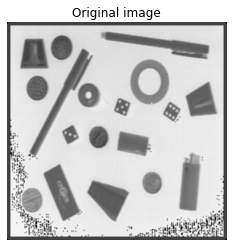

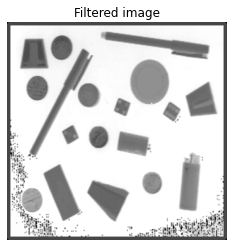

In [ ]:
show_image(img, "Original image")
img_filtered = apply_area_open_filter(img, Bc, area=50000)
show_image(img_filtered, "Filtered image")